In [101]:
#importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sb
import zipfile
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [102]:
#abrir o arquivo zip online
url_zip = 'https://dadosabertos.go.gov.br/dataset/cd82f643-f203-41d9-9542-9250df93cd14/resource/38d3358b-4de8-45ed-8bb8-ad0206782762/download/repasses_municipios_2014_2024.zip'

response = requests.get(url_zip) #requisição para pegar o arquivo zip

#zipfile para abrir o arquivo zip
arquivo_zip = zipfile.ZipFile(BytesIO(response.content)) 

if response.status_code == 200:
    print("Arquivo zip baixado com sucesso!")
else:
    print(f"Erro ao baixar o arquivo zip: {response.status_code}")

Arquivo zip baixado com sucesso!


In [103]:
# Mostrar os arquivos que estão dentro do zip
arquivos = arquivo_zip.namelist()
quantidade_arquivos = len(arquivos)
print(f"Quantidade de arquivos no zip: {quantidade_arquivos}")
#Visualizando os nomes dos arquivos
for arquivo in arquivos:
    print(arquivo)

Quantidade de arquivos no zip: 126
RepassesMunicipios201411.csv
RepassesMunicipios201602.csv
RepassesMunicipios201704.csv
RepassesMunicipios201709.csv
RepassesMunicipios201706.csv
RepassesMunicipios201910.csv
RepassesMunicipios201912.csv
RepassesMunicipios202110.csv
RepassesMunicipios202112.csv
RepassesMunicipios202205.csv
RepassesMunicipios202207.csv
RepassesMunicipios202208.csv
RepassesMunicipios202301.csv
RepassesMunicipios202303.csv
RepassesMunicipios202402.csv
RepassesMunicipios201401.csv
RepassesMunicipios201403.csv
RepassesMunicipios201505.csv
RepassesMunicipios201507.csv
RepassesMunicipios201610.csv
RepassesMunicipios201508.csv
RepassesMunicipios201612.csv
RepassesMunicipios201804.csv
RepassesMunicipios201806.csv
RepassesMunicipios201902.csv
RepassesMunicipios201809.csv
RepassesMunicipios202004.csv
RepassesMunicipios202006.csv
RepassesMunicipios202102.csv
RepassesMunicipios202311.csv
RepassesMunicipios202410.csv
RepassesMunicipios202412.csv
RepassesMunicipios201511.csv
Repasses

In [24]:
#separando os arquivos por ano, por exemplo, 2014, 2015, etc. e ordenando-os os arquivos internos em ordem alfabética
arquivos_2014 = sorted([arquivo for arquivo in arquivos if '2014' in arquivo])
arquivos_2015 = sorted([arquivo for arquivo in arquivos if '2015' in arquivo]) 
arquivos_2016 = sorted([arquivo for arquivo in arquivos if '2016' in arquivo])
arquivos_2017 = sorted([arquivo for arquivo in arquivos if '2017' in arquivo])
arquivos_2018 = sorted([arquivo for arquivo in arquivos if '2018' in arquivo])
arquivos_2019 = sorted([arquivo for arquivo in arquivos if '2019' in arquivo])
arquivos_2020 = sorted([arquivo for arquivo in arquivos if '2020' in arquivo])
arquivos_2021 = sorted([arquivo for arquivo in arquivos if '2021' in arquivo])
arquivos_2022 = sorted([arquivo for arquivo in arquivos if '2022' in arquivo])
arquivos_2023 = sorted([arquivo for arquivo in arquivos if '2023' in arquivo])
arquivos_2024 = sorted([arquivo for arquivo in arquivos if '2024' in arquivo])


In [152]:
#criando um lista com os arquivos de cada ano
lista_arquivos = [
    arquivos_2014, arquivos_2015, arquivos_2016, arquivos_2017,
    arquivos_2018, arquivos_2019, arquivos_2020, arquivos_2021,
    arquivos_2022, arquivos_2023, arquivos_2024
]

In [153]:
for i, ano in enumerate(range(2014, 2025)):
    print(f"Arquivos de {ano}:")
    for arquivo in lista_arquivos[i]:
        print(f" - {arquivo}")
    print()  # Linha em branco para melhor legibilidade

Arquivos de 2014:
 - RepassesMunicipios201401.csv
 - RepassesMunicipios201402.csv
 - RepassesMunicipios201403.csv
 - RepassesMunicipios201404.csv
 - RepassesMunicipios201405.csv
 - RepassesMunicipios201406.csv
 - RepassesMunicipios201407.csv
 - RepassesMunicipios201408.csv
 - RepassesMunicipios201409.csv
 - RepassesMunicipios201410.csv
 - RepassesMunicipios201411.csv
 - RepassesMunicipios201412.csv

Arquivos de 2015:
 - RepassesMunicipios201501.csv
 - RepassesMunicipios201502.csv
 - RepassesMunicipios201503.csv
 - RepassesMunicipios201504.csv
 - RepassesMunicipios201505.csv
 - RepassesMunicipios201506.csv
 - RepassesMunicipios201507.csv
 - RepassesMunicipios201508.csv
 - RepassesMunicipios201509.csv
 - RepassesMunicipios201510.csv
 - RepassesMunicipios201511.csv
 - RepassesMunicipios201512.csv

Arquivos de 2016:
 - RepassesMunicipios201601.csv
 - RepassesMunicipios201602.csv
 - RepassesMunicipios201603.csv
 - RepassesMunicipios201604.csv
 - RepassesMunicipios201605.csv
 - RepassesMunic

In [148]:
#mostrando os arquivos de 2014 em ordem alfabética
print("Arquivos de 2014:")
for arquivo2014 in arquivos_2014:
    print(arquivo2014)


Arquivos de 2014:
RepassesMunicipios201401.csv
RepassesMunicipios201402.csv
RepassesMunicipios201403.csv
RepassesMunicipios201404.csv
RepassesMunicipios201405.csv
RepassesMunicipios201406.csv
RepassesMunicipios201407.csv
RepassesMunicipios201408.csv
RepassesMunicipios201409.csv
RepassesMunicipios201410.csv
RepassesMunicipios201411.csv
RepassesMunicipios201412.csv


In [154]:
def criar_df_mes_icms(arquivo_zip, arquivo_nome, municipio='GOIANIA'):
    """
    Abre um arquivo CSV de um mês específico do zip, filtra pelo município e retorna apenas as colunas de ICMS,
    já com a coluna DATA_REPASSE no formato dia/mês/ano.
    """
    icms = ['DATA_REPASSE', 'NOME_MUNICIPIO', 'DEDUCAO_FUNDEB_ICMS', 'VALOR_BRUTO_ICMS', 'VALOR_CREDITADO_ICMS']
    with arquivo_zip.open(arquivo_nome) as arquivo:
        df = pd.read_csv(arquivo, sep=';', encoding='latin1')
    df_municipio = df[df['NOME_MUNICIPIO'] == municipio]
    df_icms = df_municipio[icms].copy()
    df_icms['DATA_REPASSE'] = pd.to_datetime(df_icms['DATA_REPASSE'], errors='coerce').dt.strftime('%d/%m/%Y')
    return df_icms

In [157]:
df_201408_icms = criar_df_mes_icms(arquivo_zip, arquivos_2014[7], 'GOIANIA')
df_201408_icms.head()  # Mostrando as primeiras linhas do DataFrame filtrado para ICMS de Goiânia em agosto de 2014

,DATA_REPASSE,NOME_MUNICIPIO,DEDUCAO_FUNDEB_ICMS,VALOR_BRUTO_ICMS,VALOR_CREDITADO_ICMS
91,01/08/2014,GOIANIA,NaN,NaN,NaN
331,04/08/2014,GOIANIA,NaN,NaN,NaN
573,05/08/2014,GOIANIA,1634908.7,8174541.61,6539632.91
812,06/08/2014,GOIANIA,NaN,NaN,NaN
1037,07/08/2014,GOIANIA,NaN,NaN,NaN


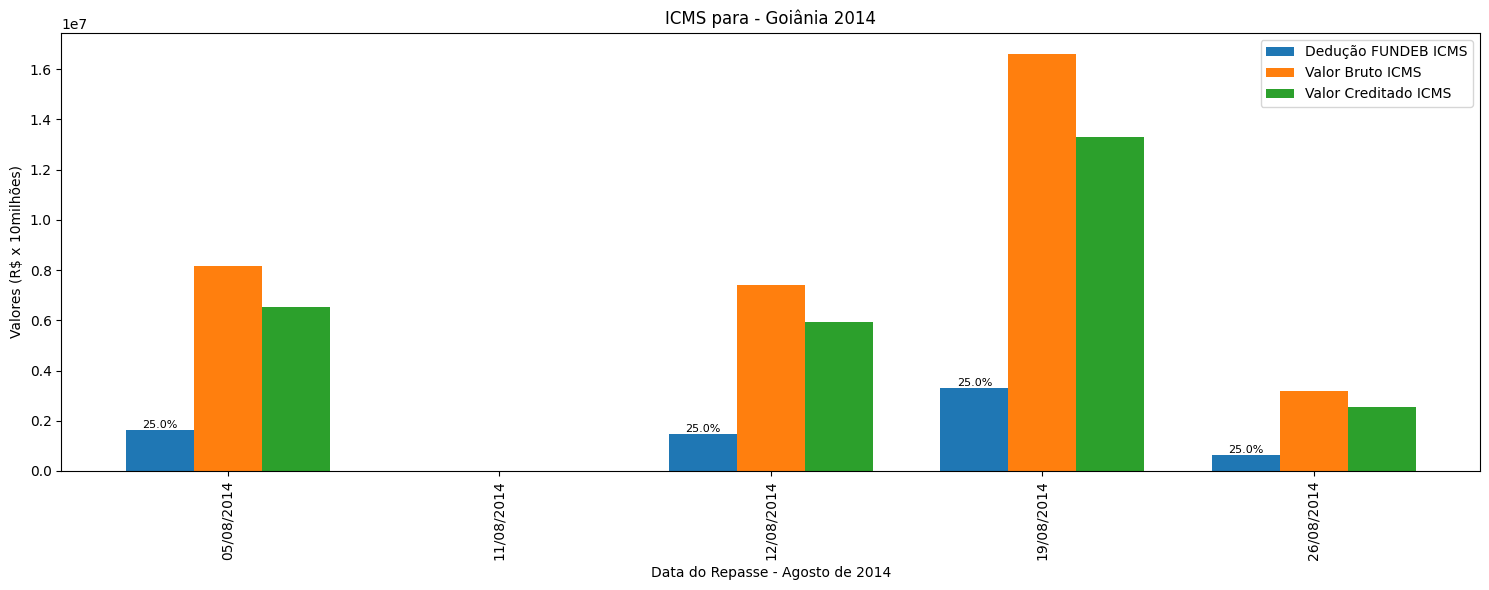

In [161]:
# Remover linhas com valores NaN nas colunas de interesse
df_plot = df_201408_icms.dropna(subset=['DEDUCAO_FUNDEB_ICMS', 'VALOR_BRUTO_ICMS', 'VALOR_CREDITADO_ICMS']).copy()


plt.figure(figsize=(15, 6))
bar_width = 0.25
x = range(len(df_plot))

# Plotar as barras agrupadas
bars_deducao = plt.bar([i - bar_width for i in x], df_plot['DEDUCAO_FUNDEB_ICMS'], width=bar_width, label='Dedução FUNDEB ICMS')
plt.bar(x, df_plot['VALOR_BRUTO_ICMS'], width=bar_width, label='Valor Bruto ICMS')
plt.bar([i + bar_width for i in x], df_plot['VALOR_CREDITADO_ICMS'], width=bar_width, label='Valor Creditado ICMS')

# Adicionar porcentagem acima das barras de DEDUCAO_FUNDEB_ICMS
for i, (ded, cred) in enumerate(zip(df_plot['DEDUCAO_FUNDEB_ICMS'], df_plot['VALOR_CREDITADO_ICMS'])):
    if cred != 0:
        pct = 100 * ded / cred
        plt.text(i - bar_width, ded, f'{pct:.1f}%', ha='center', va='bottom', fontsize=8, color='black', rotation=0)

plt.xticks(ticks=x, labels=df_plot['DATA_REPASSE'], rotation=90)
plt.xlabel('Data do Repasse - Agosto de 2014')
plt.ylabel('Valores (R$ x 10milhões)')
plt.title('ICMS para - Goiânia 2014')
plt.legend()
plt.tight_layout()
plt.show()